In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Veri setini yukledik ve nasil gozuktugunu gorduk.

In [6]:
dataset = pd.read_csv('car_details.csv')
dataset.head(3) # Ilk uc terimi inceleme

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [8]:
# Veri setinin son kismini kontrol ettik ve kac adet veri oldugunun da bilgisini edindik.

In [10]:
# Veri seti feature'lari ve type'lari hakkinda bilgi edindik.

In [12]:
dataset.tail(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [14]:
dataset.shape

(8128, 13)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [18]:
# Islemlere verisetini kopyalama islemi ile basliyoruz. Sorunlara karsi onlem.
df = dataset.copy() 
df = df.drop_duplicates() # Tüm satırlar için tekrar edenleri kaldırma:

In [20]:
# Object türündeki tüm sütunları buluyoruz
object_columns = df.select_dtypes(include=['object']).columns

# Bu sütunları toplu olarak Categorical türüne dönüştürüyoruz
df[object_columns] = df[object_columns].apply(lambda col: pd.Categorical(col))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6926 non-null   category
 1   year           6926 non-null   int64   
 2   selling_price  6926 non-null   int64   
 3   km_driven      6926 non-null   int64   
 4   fuel           6926 non-null   category
 5   seller_type    6926 non-null   category
 6   transmission   6926 non-null   category
 7   owner          6926 non-null   category
 8   mileage        6718 non-null   category
 9   engine         6718 non-null   category
 10  max_power      6721 non-null   category
 11  torque         6717 non-null   category
 12  seats          6718 non-null   float64 
dtypes: category(9), float64(1), int64(3)
memory usage: 486.2 KB


In [24]:
# Kac adet eksik veri var?

In [26]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [28]:
# Eksik bilgilerin oldugu verileri silme.

In [30]:
df = df.dropna()

In [32]:
df.shape

(6717, 13)

In [34]:
# Sayısal veri tipine çevrilmesi gereken sütunlar
numeric_columns = ['mileage', 'engine', 'max_power', 'torque']

# Sayısal olmayan karakterleri kaldırıp, sütunları sayısal değerlere dönüştürüyoruz
for column in numeric_columns:
    # Sayısal olmayan karakterleri çıkar ve sayısal değerlere dönüştür
    df[column] = pd.to_numeric(df[column].str.extract('(\d+\.?\d*)')[0], errors='coerce')
    
# Veriyi kontrol etme
df[numeric_columns].head(3)

,mileage,engine,max_power,torque
0,23.40,1248,74.00,190.0
1,21.14,1498,103.52,250.0
2,17.70,1497,78.00,12.7


In [36]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,12.7,5.0


In [38]:
df.isnull().sum() # Veri setindeki eksik gozlemler kac tane?

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [40]:
# Kategorik Degiskenleri One-Hot(Sira olmayanlar icin) ve Label(Siralilar) Encoding ile kullanima hazir hale getirme

In [42]:
from sklearn.preprocessing import LabelEncoder

# Kategorik değişkenleri seç
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

# Her kategorik değişken için LabelEncoder uygulama
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le  # İleride gerekirse dönüşümleri geri almak için encoder'ları sakla

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6717 non-null   category
 1   year           6717 non-null   int64   
 2   selling_price  6717 non-null   int64   
 3   km_driven      6717 non-null   int64   
 4   fuel           6717 non-null   int64   
 5   seller_type    6717 non-null   int64   
 6   transmission   6717 non-null   int64   
 7   owner          6717 non-null   int64   
 8   mileage        6717 non-null   float64 
 9   engine         6717 non-null   int64   
 10  max_power      6717 non-null   float64 
 11  torque         6717 non-null   float64 
 12  seats          6717 non-null   float64 
dtypes: category(1), float64(4), int64(8)
memory usage: 775.9 KB


In [46]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.40,1248,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.70,1497,78.00,12.7,5.0


In [48]:
# Brand, Model olusturma

In [50]:
# İlk olarak, 'name' sütununu 'brand' ve 'model' olarak ayırıyoruz
df[['brand', 'model']] = df['name'].str.split(' ', n=2, expand=True)[[0, 1]]

# 'brand' ve 'model' sütunlarını sayısal hale getirmek için Label Encoding uyguluyoruz
label_encoders = {}
for column in ['brand', 'model']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Encoder'ları ileride kullanmak için saklayabiliriz

# 'brand' ve 'model' sütunları artık sayısal hale getirildi
print(df[['brand', 'model']].head())

   brand  model
0     20    152
1     26    126
2     10     35
3     11    196
4     20    152


In [52]:
df['brand_model'] = df['brand'] + df['model']

In [54]:
# Veri setindeki aykiriliklari gozlemleme

In [56]:
print("Ortalama: " + str(df["selling_price"].mean()))
print("Dolu Gözlem Sayısı: " + str(df["selling_price"].count()))
print("Maksimum Değer: " + str(df["selling_price"].max()))
print("Minimum Değer: " + str(df["selling_price"].min()))
print("Medyan: " + str(df["selling_price"].median()))
print("Standart Sapma: " + str(df["selling_price"].std()))

Ortalama: 526385.9970224802
Dolu Gözlem Sayısı: 6717
Maksimum Değer: 10000000
Minimum Değer: 29999
Medyan: 420000.0
Standart Sapma: 523550.448296879


In [58]:
df['seats'].describe().T
# 5'ten fazla koltuğa sahip olan verileri çıkararak yeni bir DataFrame oluşturuyoruz
df = df[df['seats'] <= 5]
# 'seats' sütununu veri setinden tamamen kaldırıyoruz
df = df.drop(columns=['seats'])

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5380.0,2013.557807,4.023472,1994.0,2011.00,2014.00,2017.0,2020.0
selling_price,5380.0,476208.325279,509922.635640,29999.0,225000.00,375000.00,585000.0,10000000.0
km_driven,5380.0,67870.366729,53626.305396,1.0,35000.00,60000.00,90000.0,2360457.0
fuel,5380.0,2.057807,1.009070,0.0,1.00,3.00,3.0,3.0
seller_type,5380.0,0.901115,0.314309,0.0,1.00,1.00,1.0,2.0
transmission,5380.0,0.912825,0.282117,0.0,1.00,1.00,1.0,1.0
owner,5380.0,0.878439,1.249688,0.0,0.00,0.00,2.0,4.0
mileage,5380.0,20.407861,3.630846,0.0,18.12,20.34,22.9,42.0
engine,5380.0,1269.282156,311.777214,624.0,1086.00,1248.00,1461.0,3604.0
max_power,5380.0,83.190651,29.172252,32.8,67.10,78.90,88.8,400.0


In [62]:
# Veri setindeki aykiriliklari temizlemeliyiz.

In [64]:
# Sayısal koşullara göre aykırı değerleri temizleme
def filter_by_conditions(df):
    # 'year' değişkeni için 1994 ile 2020 aralığında
    df = df[(df['year'] >= 1994) & (df['year'] <= 2020)]
    
    # 'selling_price' değişkeni için 
    df = df[(df['selling_price'] >= 100000) & (df['selling_price'] <= 900000)]
    
    # 'km_driven' değişkeni için 1 ile 2360457 aralığında
    df = df[(df['km_driven'] >= 1) & (df['km_driven'] <= 135000)]
    
    return df

# Filtreleme işlemini uygulama
df = filter_by_conditions(df)

In [66]:
# IQR yöntemiyle aykırı değerleri temizleme fonksiyonu
def remove_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Farklı çarpanlar için her değişkende aykırı değerleri temizleme
df_cleaned = remove_outliers(df, 'selling_price', multiplier=1.5)  # Orta düzeyde IQR çarpanı
df_cleaned = remove_outliers(df_cleaned, 'km_driven', multiplier=2.5)  # Daha yüksek değişkenlik için daha esnek
df_cleaned = remove_outliers(df_cleaned, 'mileage', multiplier=1.8)  # Biraz daha geniş bir çarpan
df_cleaned = remove_outliers(df_cleaned, 'engine', multiplier=1.5)  # Genelde IQR çarpanı yeterli
df_cleaned = remove_outliers(df_cleaned, 'max_power', multiplier=2.0)  # Daha geniş veri aralığı için
df_cleaned = remove_outliers(df_cleaned, 'torque', multiplier=2.0)  # Daha geniş veri aralığı için

# Temizlik sonrası orijinal df'e atama
df = df_cleaned

# Temizlenmiş veri setinin boyutlarını kontrol etme
df.shape

(4360, 15)

|0.8 ve üzeri korelasyona sahip (pozitif veya negatif) özellikler arasından sadece birini seç.
|0.3 ile |0.7| arasında olan orta korelasyonlu özellikleri değerlendir, ancak gerekirse seçici ol.
|0.2 ve altındaki düşük korelasyonlu özellikleri modelde tutmayı düşün, çünkü genellikle bağımsız bilgi sağlar.

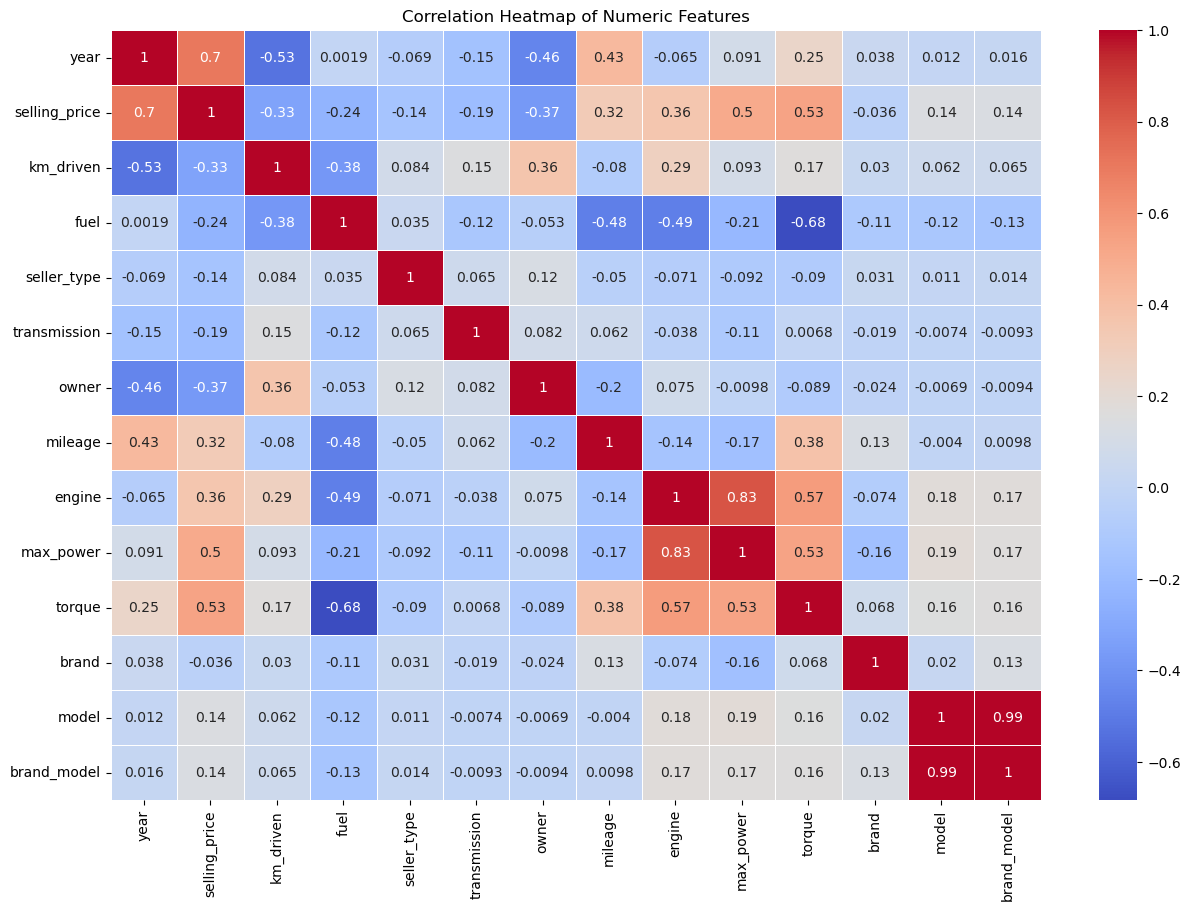

In [69]:
# Sadece sayısal sütunları seçme
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Sayısal sütunlarla korelasyon matrisini oluşturma
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

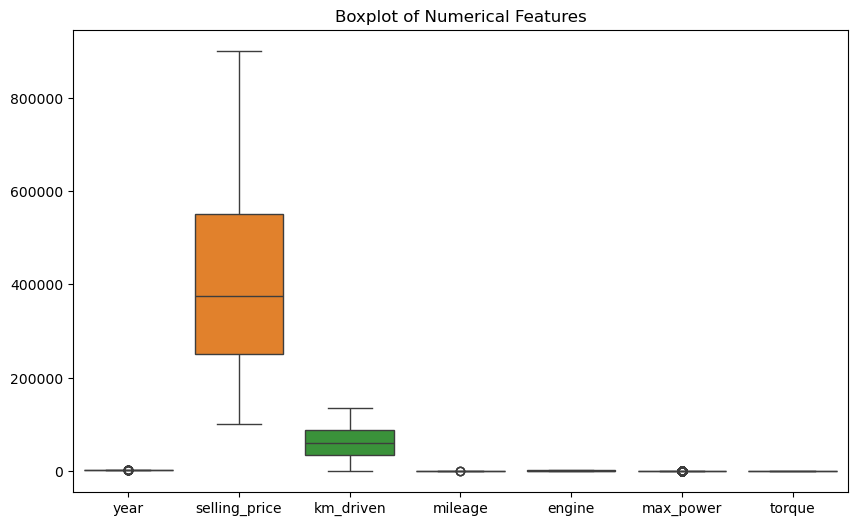

In [71]:
# Aykırı değerleri görmek için boxplot oluşturma
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']])
plt.title('Boxplot of Numerical Features')
plt.show()

In [73]:
# Scaling Yapma

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Kullanmak istediğiniz özellikleri seçin
features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

# Seçili özellikleri ölçekleyin
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [77]:
# Model Olusturma ve Egitme

In [79]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,brand,model,brand_model
1,Skoda Rapid 1.5 TDI Ambition,0.73913,370000,0.888888,1,1,1,2,0.495125,0.74383,0.723591,0.960676,26,126,152


In [81]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Veri setini yükleyin (örneğin: df)
# Özellik ve hedef değişkenleri ayırın
X = df[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'mileage', 'fuel', 'transmission', 'seller_type', 'model', 'brand_model']]
# X = df[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']]

y = df['selling_price']

In [83]:
# Veriyi %80 eğitim, %20 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Modeli tanımla
model = Sequential()

# İlk gizli katman (Dense layer)
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))

# İkinci gizli katman
model.add(Dense(128, activation='relu'))

# Üçüncü gizli katman
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

# Çıkış katmanı (regresyon olduğu için aktivasyon fonksiyonu yok)
model.add(Dense(1))

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
from keras.optimizers import Adam

# Adam optimizatörünü özelleştirme
# optimizer = Adam(learning_rate=0.0005, beta_1=0.8, beta_2=0.999, epsilon=1e-07) --> 87.27 80 epochs
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999) 


# Modeli derleme
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Modeli eğitme
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 59218436096.0000 - mae: 190488.7812 - val_loss: 61264297984.0000 - val_mae: 188265.0781
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 55825330176.0000 - mae: 184550.4219 - val_loss: 60793012224.0000 - val_mae: 187510.5156
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 57451003904.0000 - mae: 187173.7656 - val_loss: 60305375232.0000 - val_mae: 186685.4844
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 54861438976.0000 - mae: 181127.6875 - val_loss: 59792945152.0000 - val_mae: 185870.7344
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 56398430208.0000 - mae: 183759.6719 - val_loss: 59208372224.0000 - val_mae: 185138.8281
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 53719420928.0000 - mae: 179335.9844 - val_loss: 58667458560.0000 - val_mae: 184142.8125
Epoch 7/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 51903528960.0000 - mae: 177312.

In [100]:
# Test seti üzerindeki tahminleri yapma
y_pred = model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step


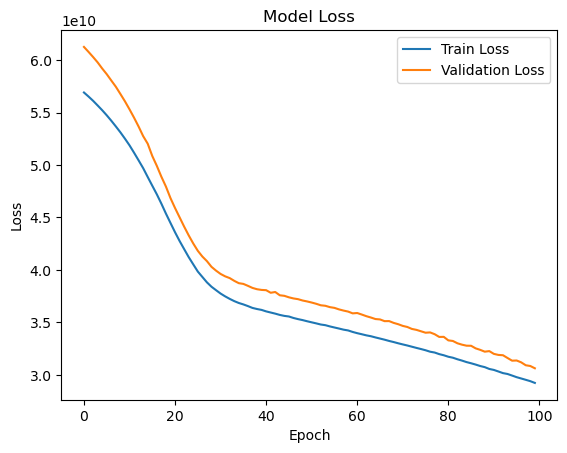

In [101]:
# Eğitim sürecindeki kaybı görselleştirme
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# MAE hesaplama
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# RMSE hesaplama
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Gerçek değerlerin ortalamasını hesaplayalım
mean_price = np.mean(y_test)

# Yüzdesel hata hesaplama
percentage_error = (mae / mean_price) * 100
print(f'Percentage Error: {percentage_error:.2f}%')
print(f'Başarı: {100 - percentage_error:.2f}%')

# R-squared hesaplama
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 147472.75412127294
Root Mean Squared Error: 174988.1765761764
Percentage Error: 35.85%
Başarı: 64.15%
R-squared: 0.27
